# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Os dados são criados a seguir:

In [3]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




### O teste é unilateral a esquerda, a justificativa se dá por conta da hipótese alternativa afirmar que a média B é maior que a média A, tornando o teste unilateral a esquerda

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [4]:
# Calculando as médias e variância das amostras
media_A = np.mean(amostra_estrategia_A)
media_B = np.mean(amostra_estrategia_B)
var_A = np.var(amostra_estrategia_A, ddof=1)
var_B = np.var(amostra_estrategia_B, ddof=1)

print(f"Média da Estratégia A: {media_A:.2f}, Variância: {var_A:.2f}")
print(f"Média da Estratégia B: {media_B:.2f}, Variância: {var_B:.2f}")

Média da Estratégia A: 71.41, Variância: 129.27
Média da Estratégia B: 74.75, Variância: 110.47


##### A média da estratégia B é maior com a variância menor, estes fatores indicam uma ideia mais orte de que realmente a estratégia B é mais eficiente e não estamos lidando com uma coincidência, entretanto, mais testes precisam ser feitos para ter certeza

# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [13]:
# Realizando o teste Z e calculando o p-valor unilateral a esquerda
z_score = (media_A - media_B) / np.sqrt((var_A / len(amostra_estrategia_A)) + (var_B / len(amostra_estrategia_B)))
p_valor = stats.norm.cdf(z_score)

print(f"Z-Score: {z_score:.2f}, P-Valor: {p_valor:.4f}")

# Análise dos resultados
if p_valor < 0.05:
    print("\nRejeitamos a hipótese nula: há evidências suficientes para afirmar que a Estratégia B é mais eficiente que a Estratégia A.")
else:
    print("\nNão rejeitamos a hipótese nula: não há evidências suficientes para afirmar que a Estratégia B é mais eficiente que a Estratégia A.")


Z-Score: -1.53, P-Valor: 0.0634

Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que a Estratégia B é mais eficiente que a Estratégia A.


##### Aceitaremos a hipótese nula, afirmando que não há diferença significante entre as estrátegias A e B. Essa decisão se baseia no resultado do p-value, que foi de 0.0634, estando acima do limite estipulado de 0.05

# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

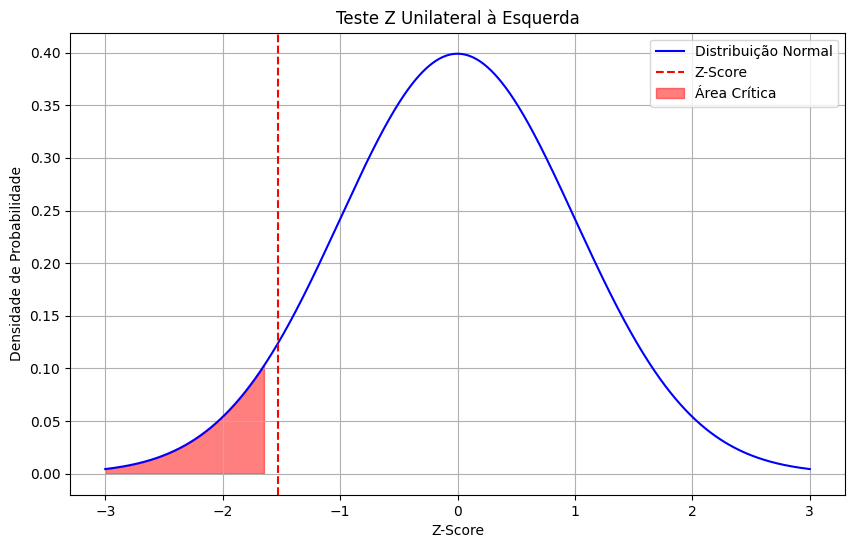

In [16]:
# Visualização do Z-Score na distribuição normal
z_crit = -1.645  # z crítico para alfa 0.05 (unilateral à esquerda)

x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição Normal', color='blue')
plt.axvline(z_score, color='red', linestyle='--', label='Z-Score')
plt.fill_between(x, y, where=(x <= z_crit), color='red', alpha=0.5, label='Área Crítica')

plt.title('Teste Z Unilateral à Esquerda')
plt.xlabel('Z-Score')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()

##### Ao observar o gráfico é perceptível que o z-score está fora da área crítica, reforçando ainda mais a ideia de que a hipótese nula está correta